# Capstone Project - The Battle of the Neighborhoods

# Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem <a name="introduction"></a>



 Indian cuisine, one of the most flavorful cuisine in the world, has found its way to the street of the biggest cities in the US and in Europe. In London, the so-called "curry houses" have gained a tremendous influence and became a popular place to eat. This fast-growing sector of the restaurant industry offers many opportunities for new restaurateurs to invest.

 Even with the success of Indian cuisine in London, many other factors should be considered when opening a new restaurant. One of the most important factors is location. The choice of location is very important as it can be the determining factor of success, regardless of the quality of the food or the service.

 Data-driven decision making, or data science, can be very helpful in finding an adequate location. Information about potential customers, the existing demand for a particular menu, the competitiveness among restaurants, or the safety, can be analyzed in order to pick the best location.

 In this project, we are going to help a restaurateur pick the location of his new Indian restaurant in London. With the increasing rate at which Indian cuisine is becoming popular in the UK, our restaurateur has some specific requirements for his location:
 - **Safety:** the area should be safe! Safety is the primary concern of any business and thus places with high crime should be avoided.
 - **Costumer profile:** Our restaurateur wants to have a customer base that already has an acquired taste for Indian cuisine. The location should then have a high Indian population, or other nationalities that have similar cuisine.
 - **Competition:** Our restaurateur has a marketing plan that will benefit him if the location already has some Indian restaurants around. However, to avoid too much competition, it should not be crowded with Indian restaurants.
 - **Customer purchasing power:** Because Indian food is rich in condiments, it is expensive to make, thus not affordable to everybody. To make sure his restaurant keeps a high customer influx, our restaurateur wants to be in an area where most people have a middle class income.
 - **Location affordability:** Because our restaurateur hasn't built a name yet, he does not want most of invested money to go to rent, instead of advertising. Rent should then be affordable.

These requirements are going to guide this project and by the end of it, the restaurateur will have the list of neighborhoods that fit his needs.
 




# Data <a name="data"></a>

### Description

 The data used for this project comes from multiple sources is defines as below:

**Demographic data of all boroughs of London:**
This data comes from Kaggle and is the first step of the project. For each of the 34 boroughs in London, it contains information like:
- Population density
- Average age
- Largest, second and third migrant population and percentage
- Employment rate
- Gross annual pay
- Crime rate, among others.

Crucial information can be revealed from the demographic analysis of London. For example, we can determine where the majority of Indians are clustered in London, or what places should be avoided because of safety concerns.	

**List of neighborhoods and their coordinates:**
The data from Kaggle provides information for each borough in London, but boroughs are too large areas for this project. We need to work on a deeper level of neighborhoods. The list of neighborhoods of each borough can be found on wikipedia.com. Also, the coordinates for each neighborhood can be found using the Google API.
	
**Foursquare data:**
Using Foursquare, we will be able to gather information about restaurants surrounding the neighborhoods in London. This part of the data is important when it comes to evaluating the competition around an area. We can retrieve information about other Indian restaurants such as: 
- The number of Indian restaurants
- The number of likes
- The rating



### Data gathering

Let's import the data in the form of a csv file from Kaggle

In [144]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
london_demo= pd.read_csv('/Users/IsmaelSiffon/Documents/Jupiter_directory/london-borough-profiles-2016 Data set.csv')
london_demo.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,...,5.99,5.57,NaN,2.6,128.8,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,"205,773","76,841","3,610.8",57.3,32.9,21.0,...,7.05,3.05,25.3,7.3,227.6,Lab,0.0,100.0,0.0,36.5
3,E09000003,E09000003,Barnet,Outer London,"385,108","149,147","8,674.8",44.5,37.2,21.0,...,7.37,2.75,18.4,6.0,133.8,Cons,50.8,47.6,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,"243,303","97,233","6,058.1",39.9,38.9,20.8,...,7.21,3.29,21.4,6.9,164.3,Cons,71.4,23.8,0.0,39.6


### Data cleaning:
Let's remove the columns and rows we do not need and only keep the data needed for our analysis:

In [3]:
london_demo2= london_demo.drop(london_demo.index[0])
london_demo2= london_demo2.drop(london_demo.index[34:])
london_demo2.rename (columns = {'Area name':'Borough'}, inplace = True)
london_demo2= london_demo2.reset_index(drop=True)
london_demo2= london_demo2[['Borough','Population density (per hectare) 2016','Largest migrant population by country of birth (2011)','% of largest migrant population (2011)','Second largest migrant population by country of birth (2011)','% of second largest migrant population (2011)','Third largest migrant population by country of birth (2011)','% of third largest migrant population (2011)','Gross Annual Pay, (2015)','Crime rates per thousand population 2014/15','Median House Price, 2014']]
london_demo2=london_demo2.set_index('Borough')
london_demo2=london_demo2.replace ('.' , np.nan)

#Let's remove the unwanted characters form the cells:
london_demo2['Gross Annual Pay, (2015)']=london_demo2['Gross Annual Pay, (2015)'].replace('[/£,]','', regex=True)
london_demo2['Median House Price, 2014']=london_demo2['Median House Price, 2014'].replace('[,]','', regex=True)
london_demo2.head()

,Population density (per hectare) 2016,Largest migrant population by country of birth (2011),% of largest migrant population (2011),Second largest migrant population by country of birth (2011),% of second largest migrant population (2011),Third largest migrant population by country of birth (2011),% of third largest migrant population (2011),"Gross Annual Pay, (2015)",Crime rates per thousand population 2014/15,"Median House Price, 2014"
Borough,,,,,,,,,,
City of London,28.9,United States,2.8,France,2.0,Australia,1.9,NaN,NaN,765000
Barking and Dagenham,57.3,Nigeria,4.7,India,2.3,Pakistan,2.3,28428,83.4,215000
Barnet,44.5,India,3.1,Poland,2.4,Iran,2.0,33084,62.7,400000
Bexley,39.9,Nigeria,2.6,India,1.5,Ireland,0.9,32040,51.8,250000
Brent,76.1,India,9.2,Poland,3.4,Ireland,2.9,29777,78.8,385000


Let's check and adjust the column's types:

In [4]:
london_demo2.dtypes

Population density (per hectare) 2016                           object
Largest migrant population by country of birth (2011)           object
% of largest migrant population (2011)                          object
Second largest migrant population by country of birth (2011)    object
% of second largest migrant population (2011)                   object
Third largest migrant population by country of birth (2011)     object
% of third largest migrant population (2011)                    object
Gross Annual Pay, (2015)                                        object
Crime rates per thousand population 2014/15                     object
Median House Price, 2014                                        object
dtype: object

In [5]:
# Let's change the column's types with numbers from object to float:

conv_dic= {'Population density (per hectare) 2016':float,
          '% of largest migrant population (2011)':float,
          '% of second largest migrant population (2011)':float,
          '% of third largest migrant population (2011)':float,
           'Gross Annual Pay, (2015)':float,
          'Crime rates per thousand population 2014/15':float,
          'Median House Price, 2014':float}
london_demo2=london_demo2.astype(conv_dic)
london_demo2.dtypes

Population density (per hectare) 2016                           float64
Largest migrant population by country of birth (2011)            object
% of largest migrant population (2011)                          float64
Second largest migrant population by country of birth (2011)     object
% of second largest migrant population (2011)                   float64
Third largest migrant population by country of birth (2011)      object
% of third largest migrant population (2011)                    float64
Gross Annual Pay, (2015)                                        float64
Crime rates per thousand population 2014/15                     float64
Median House Price, 2014                                        float64
dtype: object

This concludes the data gathering and cleaning phase. Next we will explained the methodology and proceed with the analysis.

# Methodology <a name="methodology"></a>

In this project, we are going to use the data collected in order to find a location that fits the requirements imposed by our restaurateur. These requirements will then guide the direction of our workflow.

The first step was to gather and clean data. The data collected provides demographic information about every borough in London. We decided to only keep the columns related to our objective such as crime rate, gross pay, median house price, and migrant population data. 
- Crime rate will be used to tackle the safety concern
- Gross pay will be used to tackle the customer's purchasing power concern
- House price will be used to compare how expensive renting a local can be.
- Migrant population data will be used to reveal the areas with a large population of Indians.

Now that our data is ready to be used, we will first observe its behavior using statistical numbers and some plots for visualization. We will then transform the data in order to have meaningful numbers. One of the requirements is to have an Indian cuisine lover customer base. For that, we will calculate the density of the Indian/Pakistan/Sri Lanka population for the boroughs where they appear in the list of the three largest migrant population. With this information, we will be able to locate clusters of migrants from Indian/Pakistan/Sri Lanka.
The next step will be to filter out the boroughs that do not meet the requirements. Here are the conditions that need to be met:
- Crime rate < 75th percentile
- Density from India/Pakistan/Sri Lanka > 2 people per hectare
- Gross pay > £30,000
- Median house price < £500,000 

After filtering out the boroughs that do not fit the requirement, we will focus on the remaining boroughs and look into their neighborhoods. After importing the neighborhoods geospatial coordinates from the Google API, we will explore all the Indians restaurants within them using **Foursquare**. The purpose of that is to be able to compare the competitiveness and the customer response to Indian cuisine for each neighborhood.

Finally, we will use the clustering method to group the neighborhoods based on their similarities when it comes to Indian restaurants. Our restaurateur will be able to decide where he wants his new restaurant to be based on the competition and the customer response to Indian cuisine.




# Analysis <a name="analysis"></a>

### **Let's analyze and visualize the data collected**


In [6]:
# Let's see some statistical information about the data collected:
london_demo2.describe()

,Population density (per hectare) 2016,% of largest migrant population (2011),% of second largest migrant population (2011),% of third largest migrant population (2011),"Gross Annual Pay, (2015)",Crime rates per thousand population 2014/15,"Median House Price, 2014"
count,33.000000,33.000000,33.000000,33.000000,30.000000,32.000000,3.300000e+01
mean,73.609091,4.696970,2.860606,2.060606,33622.000000,84.868750,4.290288e+05
std,38.615422,3.098436,1.430459,0.913078,3687.779128,31.129329,2.061033e+05
min,21.700000,1.100000,1.000000,0.700000,27174.000000,50.400000,2.150000e+05
25%,44.500000,2.800000,1.800000,1.500000,31479.500000,63.800000,3.070000e+05
50%,58.800000,3.600000,2.500000,1.900000,32938.000000,77.500000,3.850000e+05
75%,108.200000,5.100000,3.500000,2.400000,35617.750000,99.675000,4.330000e+05
max,153.000000,15.300000,6.800000,5.300000,42798.000000,212.400000,1.195000e+06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac132d0>,
      dtype=object)

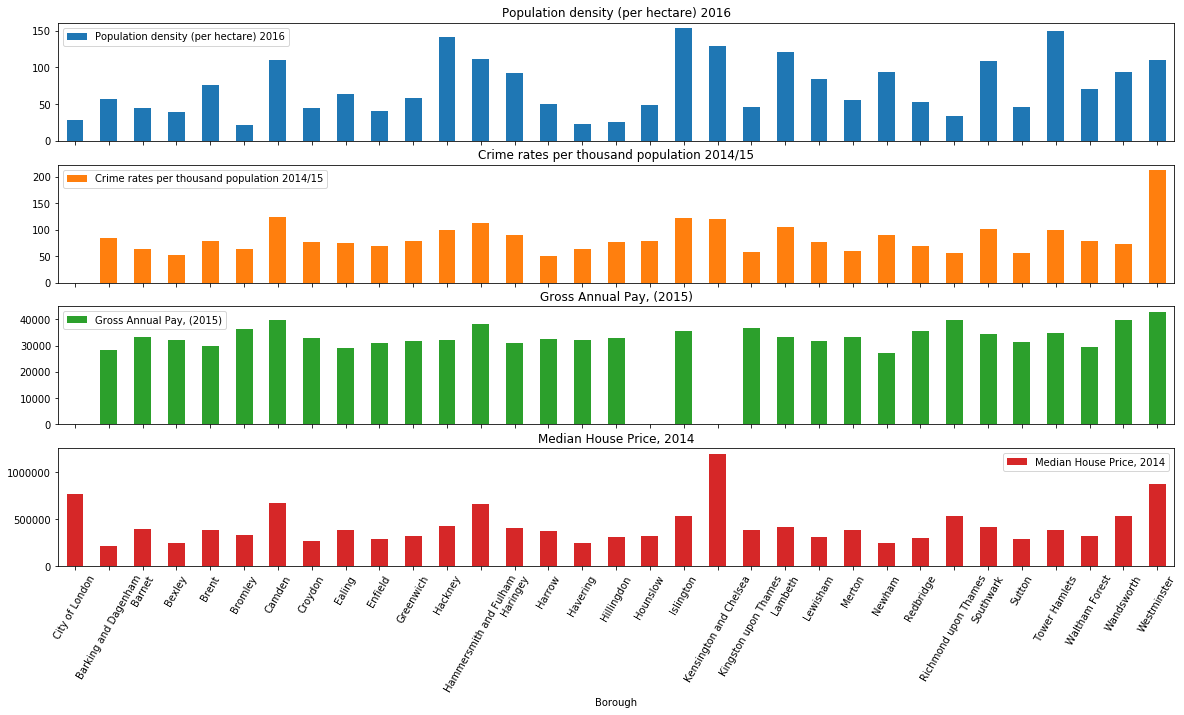

In [12]:
# Let's vizualized the data collected:
ax= london_demo2.plot(kind='bar',y=['Population density (per hectare) 2016','Crime rates per thousand population 2014/15','Gross Annual Pay, (2015)','Median House Price, 2014'],
                      subplots=True,
                      rot=60,
                     figsize=(20, 10))
ax

Our restaurateur specified that he wants his restaurant in an area that has an Indian community. We said earlier that the Indian community in the UK is important. Let's see how it compares to other migrant nationalities.

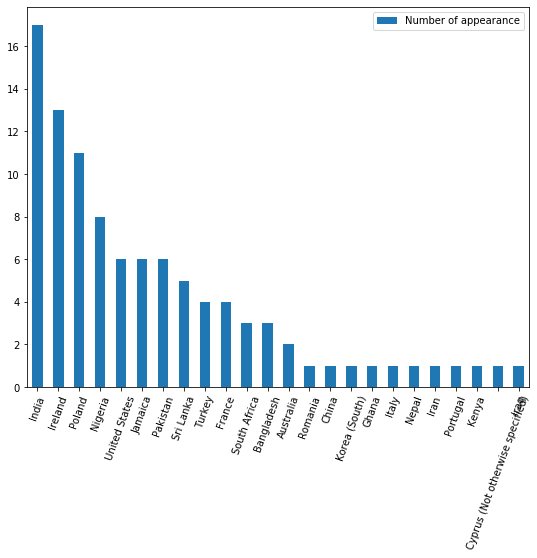

In [8]:
# Let's visualize how many time India appears in the 3 largest migrant population list:
migrant_dic={}
list_of_countries= london_demo2['Largest migrant population by country of birth (2011)'].tolist()+london_demo2['Second largest migrant population by country of birth (2011)'].tolist()+london_demo2['Third largest migrant population by country of birth (2011)'].tolist()
for country in list_of_countries:
    if country in migrant_dic.keys():
        migrant_dic[country]= migrant_dic[country]+1
    else:
        migrant_dic[country]=1

migrant_countries_df= pd.DataFrame(migrant_dic, index=['Number of appearance'])
migrant_countries_df= migrant_countries_df.T.sort_values ( by = 'Number of appearance', ascending = False, axis = 0)
migrant_countries_df.plot(kind='bar', figsize=(9,7), rot=70)

We can see that India appears the most in the list! That is good news for our restaurateur.

### Data transformation:

For our analysis, we need to have a meaningful parameter that we can use to compare the Indian poupulation between the boroughs. We decided to calculate the density of the Indians population for each borough. Also, we decided to include the population of Pakistan and Sri Lanka, because their cuisine similarities make them potential customers. The formula we used is as follows:

   **Density of India/Pakistan/Sri Lanka population = Population Density * (percentage of migrants from India + percentage of migrants from Pakistan + percentage of migrants from Sri Lanka)**

In [10]:
# Let's calculate the population density of migrants from India, Pakistan and Sri Lanka, for each borough.
london_demo3= london_demo2.copy()
for borough in london_demo3.index.values:
    if london_demo3.loc[borough,'Largest migrant population by country of birth (2011)'] in ['India','Pakistan','Sri Lanka']:
         density1=london_demo3.loc[borough,'% of largest migrant population (2011)']*london_demo3.loc[borough,'Population density (per hectare) 2016']/100
    else:
        density1=0
    if london_demo3.loc[borough,'Second largest migrant population by country of birth (2011)'] in ['India','Pakistan','Sri Lanka']:
        density2=london_demo3.loc[borough,'% of second largest migrant population (2011)']*london_demo3.loc[borough,'Population density (per hectare) 2016']/100
    else:
        density2=0
    if london_demo3.loc[borough,'Third largest migrant population by country of birth (2011)'] in ['India','Pakistan','Sri Lanka']:
        density3=london_demo3.loc[borough,'% of third largest migrant population (2011)']*london_demo3.loc[borough,'Population density (per hectare) 2016']/100
    else:
        density3=0
    london_demo3.loc[borough,'Population density from India/Pakistan/Sri Lanka']=density1+density2+density3
london_demo3= london_demo3.drop(['Largest migrant population by country of birth (2011)','% of largest migrant population (2011)','Second largest migrant population by country of birth (2011)','% of second largest migrant population (2011)','Third largest migrant population by country of birth (2011)','% of third largest migrant population (2011)'],axis=1)
london_demo3.head()

,Population density (per hectare) 2016,"Gross Annual Pay, (2015)",Crime rates per thousand population 2014/15,"Median House Price, 2014",Population density from India/Pakistan/Sri Lanka
Borough,,,,,
City of London,28.9,NaN,NaN,765000.0,0.0000
Barking and Dagenham,57.3,28428.0,83.4,215000.0,2.6358
Barnet,44.5,33084.0,62.7,400000.0,1.3795
Bexley,39.9,32040.0,51.8,250000.0,0.5985
Brent,76.1,29777.0,78.8,385000.0,7.0012


Now let's visualize the data with the new column of population density from India/Pakistan/Sri Lanka:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a7d5850>,
      dtype=object)

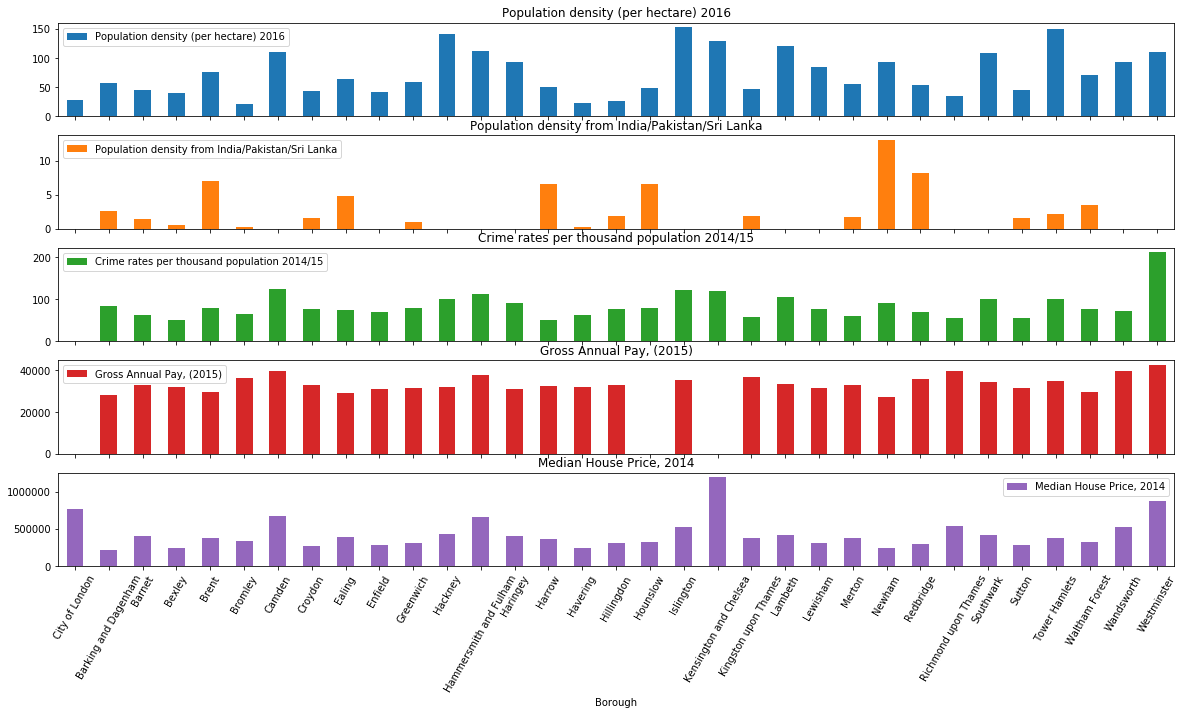

In [11]:
ax= london_demo3.plot(kind='bar',y=['Population density (per hectare) 2016','Population density from India/Pakistan/Sri Lanka','Crime rates per thousand population 2014/15','Gross Annual Pay, (2015)','Median House Price, 2014'],
                      subplots=True,
                      rot=60,
                     figsize=(20, 10))
ax

# Data filtering

Now that we have the data we need, we can start our selection by filtering out the boroughs that do not fit the requirement requested by our restaurateur. We decided to filter based on the following intervals:
- Crime rate < 75th percentile
- Density from India/Pakistan/Sri Lanka > 2 people per hectare
- Gross pay > £30,000
- Median house price < £500,000 


In [14]:
crime_max=london_demo3['Crime rates per thousand population 2014/15'].quantile(0.75)
gross_pay_min=30000
house_price_max=500000
density_min= 2
london_demo4= london_demo3[(london_demo3['Crime rates per thousand population 2014/15'] <= crime_max) &
                           (london_demo3['Gross Annual Pay, (2015)'] >= gross_pay_min) &
                           (london_demo3['Median House Price, 2014'] <= house_price_max) &
                           (london_demo3['Population density from India/Pakistan/Sri Lanka'] >= density_min)]
print('After filtering, we are left with ',london_demo4.shape[0],' boroughs to work with')
london_demo4.head()

After filtering, we are left with  2  boroughs to work with


,Population density (per hectare) 2016,"Gross Annual Pay, (2015)",Crime rates per thousand population 2014/15,"Median House Price, 2014",Population density from India/Pakistan/Sri Lanka
Borough,,,,,
Harrow,49.8,32529.0,50.4,370000.0,6.6234
Redbridge,53.3,35665.0,69.7,301500.0,8.2615


 Based on the intervals we chose, only 2 boroughs meet the requirements: Harrow and Redbridge
 We can now move on to the next part of the project which is to cluster the neighborhoods!

# Importing the neighborhoods and coordinates

Now that we reduced the list of boroughs to only 2, we can work on the neighborhoods. The neighborhoods in Harrow and Redbridge can be found on wikipedia. We used webscraping to import this information into csv files. For the purpose of not overcroweding this workbook, the links to the websraping code can be found below:
- Webscraping for neighborhoods in Harrow: https://github.com/ismaelsiffon/Coursera_Capstone_Intro/blob/master/Harrow_neigh_copy.ipynb
- Webscraping for neighborhoods in Redbridge: https://github.com/ismaelsiffon/Coursera_Capstone_Intro/blob/master/redbridge_neigh_copy.ipynb

Let's import the neighborhoods and their coordinates:

In [16]:
#import Harrow data table:
harrow_df= pd.read_csv('/Users/IsmaelSiffon/Documents/Jupiter_directory/harrow_neigh.csv')
for i in harrow_df.index.values:
    harrow_df.loc[i,'Borough']='Harrow'
new_columns= [harrow_df.columns[0]]+[harrow_df.columns[-1]]+list(harrow_df.columns[1:-1])
harrow_df= harrow_df[new_columns]

#import Rebridge data table:
redbridge_df= pd.read_csv('/Users/IsmaelSiffon/Documents/Jupiter_directory/redbridge_neigh.csv')
for i in redbridge_df.index.values:
    redbridge_df.loc[i,'Borough']='Redbridge'
new_columns= [redbridge_df.columns[0]]+[redbridge_df.columns[-1]]+list(redbridge_df.columns[1:-1])
redbridge_df= redbridge_df[new_columns]

#Merge the tables:
london_df=pd.concat([harrow_df,redbridge_df], ignore_index=True)
print("There are ",london_df.shape[0],' neighborhoods.')
london_df.head()

There are  45  neighborhoods.


,Neighborhood,Borough,Latitude,Longitude
0,Belmont,Harrow,51.601249,-0.319275
1,Canons Park,Harrow,51.607674,-0.296236
2,Greenhill,Harrow,51.583011,-0.332767
3,Harrow,Harrow,51.570632,-0.339636
4,Harrow on the Hill,Harrow,51.570632,-0.339636


# Mapping the neighborhoods

Let's map the neighborhoods and visualize their locations!

In [23]:
from geopy.geocoders import Nominatim
import folium

In [24]:
#get the coordinates of London for mapping
address = 'London, UK'
#geolocator = Nominatim(user_agent="london_explorer")
#location = geolocator.geocode(address)
latitude = 51.5073219
longitude = -0.1276474
print('The geograpical coordinate of London are {}, {}.'.format(51.5073219, -0.1276474))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [25]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(london_df['Latitude'], london_df['Longitude'], london_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# Foursquare data collecting

In [29]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Let's define a function that will retreive information about Indian restaurants around each neighborhood. We are interested in the number of Indian restaurants, their rating, and their number of likes.

In [31]:
def getNearbyIndianVenues(names, latitudes, longitudes, radius=1000, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        intent='browse'
        categoryID='4bf58dd8d48988d10f941735'
        url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&intent={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION,
            intent,
            categoryID, 
            radius, 
            limit)
            
        # make the GET request
        results1 = requests.get(url1).json()["response"]['venues']
        
        
        # return only relevant information for each nearby venue
        for v in results1:
            venueID= v['id']
            url2 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
                venueID,
                CLIENT_ID, 
                CLIENT_SECRET,
                VERSION )
            results2 = requests.get(url2).json()
            try:
                rating = results2['response']['venue']['rating']
            except:
                rating = np.nan
            try:
                likes= results2['response']['venue']['likes']['count']
            except:
                likes = np.nan
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                rating,
                likes)])

    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'Venue', 
                    'Venue rating',
                    'Venue likes' ]
    
    return(nearby_venues)

Let's apply the function to our neighborhoods:

In [32]:
london_venues = getNearbyIndianVenues(names=london_df['Neighborhood'],
                                   latitudes=london_df['Latitude'],
                                   longitudes=london_df['Longitude']
                                  )

Belmont
Canons Park
Greenhill
Harrow
Harrow on the Hill
Harrow Weald
Hatch End
Headstone
Kenton
North Harrow
Pinner
Queensbury
Rayners Lane
Roxeth
South Harrow
Stanmore
Wealdstone
West Harrow
Aldborough Hatch
Aldersbrook
Barkingside
Chadwell Heath
Clayhall
Cranbrook
Fairlop
Fullwell Cross
Gants Hill
Goodmayes
Hainault
Ilford
Little Heath
Loxford
Mayfield
Monkhams
Newbury Park
Redbridge
Seven Kings
Snaresbrook
South Woodford
Valentines
Wanstead
Wanstead Flats
Woodford
Woodford Bridge
Woodford Green


In [35]:
print('We collected data from a total of ',london_venues.shape[0],' Indian restaurants.')
london_venues.head()

We collected data from a total of  352  Indian restaurants.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue rating,Venue likes
0,Belmont,51.601249,-0.319275,Meeras Xpress,NaN,0
1,Belmont,51.601249,-0.319275,Punjab Restaurant,NaN,0
2,Belmont,51.601249,-0.319275,Circle lounge,NaN,1
3,Belmont,51.601249,-0.319275,Cardamom,NaN,0
4,Belmont,51.601249,-0.319275,"Boulevard Club, Kenton",NaN,0


Using Foursquare, we collected data from a total of 352  Indian restaurants. With this data, we will be able to cluster the neighborhoods based:
- Competiviness
- Indian cuisine response

In [36]:
# Let's assign '0' to the venues with no rating:
london_venues_2= london_venues.replace(np.nan,0)
london_venues_2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue rating,Venue likes
0,Belmont,51.601249,-0.319275,Meeras Xpress,0.0,0
1,Belmont,51.601249,-0.319275,Punjab Restaurant,0.0,0
2,Belmont,51.601249,-0.319275,Circle lounge,0.0,1
3,Belmont,51.601249,-0.319275,Cardamom,0.0,0
4,Belmont,51.601249,-0.319275,"Boulevard Club, Kenton",0.0,0


We are interested in:
- The number of Indian restaurants
- The highest rating
- The total number of likes

In [42]:
# Let's group the venues by neighborhoods and transform the data for our needs:
grouped_london_df= london_venues_2.groupby('Neighborhood').agg({'Neighborhood Latitude':'mean',
                                                              'Neighborhood Longitude':'mean',
                                                              'Venue':'count', 
                                                              'Venue rating':'max',
                                                              'Venue likes':'sum'})
grouped_london_df.rename(columns={'Venue':'Number of restaurants',
                                 'Venue rating':'Max rating',
                                 'Venue likes':'Total number of likes'}, inplace=True)
grouped_london_df

,Neighborhood Latitude,Neighborhood Longitude,Number of restaurants,Max rating,Total number of likes
Neighborhood,,,,,
Aldborough Hatch,51.585525,0.098766,1,0.0,0
Aldersbrook,51.551474,0.048841,13,7.8,64
Barkingside,51.589925,0.083874,4,0.0,4
Belmont,51.601249,-0.319275,6,0.0,3
Canons Park,51.607674,-0.296236,5,7.1,16
Chadwell Heath,51.572228,0.141995,4,0.0,1
Clayhall,51.586974,0.068774,5,0.0,2
Cranbrook,51.561326,0.068710,12,7.3,21
Fairlop,51.601893,0.084201,3,0.0,2


# Data clustering

Now we are ready to cluster the neighborhoods.

In [128]:
#Let's only keep the columns we need for clustering:
cluster_df= grouped_london_df[['Number of restaurants','Max rating','Total number of likes']]
cluster_df.head()

,Number of restaurants,Max rating,Total number of likes
Neighborhood,,,
Aldborough Hatch,1,0.0,0
Aldersbrook,13,7.8,64
Barkingside,4,0.0,4
Belmont,6,0.0,3
Canons Park,5,7.1,16


Let's normalize the data:

In [129]:
from sklearn.preprocessing import StandardScaler
X = cluster_df.values
Clus_dataSet = StandardScaler().fit_transform(X)

Now we can cluster the data:

In [130]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
cluster_df['Cluster number']=labels
cluster_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Number of restaurants,Max rating,Total number of likes,Cluster number
Neighborhood,,,,
Aldborough Hatch,1,0.0,0,0
Aldersbrook,13,7.8,64,5
Barkingside,4,0.0,4,0
Belmont,6,0.0,3,0
Canons Park,5,7.1,16,2


Here is a list of the neighborhoods with their assigned cluster labels.

In [137]:
london_df_new = london_df.merge(cluster_df, left_on='Neighborhood', right_on='Neighborhood')
london_df_new.drop(['Number of restaurants','Max rating','Total number of likes'], axis=1, inplace= True)
london_df_new.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster number
0,Belmont,Harrow,51.601249,-0.319275,0
1,Canons Park,Harrow,51.607674,-0.296236,2
2,Greenhill,Harrow,51.583011,-0.332767,3
3,Harrow,Harrow,51.570632,-0.339636,0
4,Harrow on the Hill,Harrow,51.570632,-0.339636,0


### It's a good idea to visuallize the clustering and observe how the data was clustered

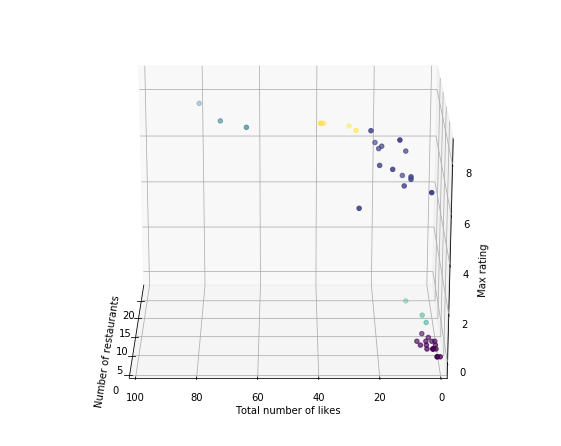

In [131]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(1, figsize= (8,6))
plt.clf()
ax1 = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=20, azim=180)
plt.cla()
ax1.set_xlabel('Number of restaurants')
ax1.set_ylabel('Total number of likes')
ax1.set_zlabel('Max rating')
ax1.set_ylim((0,100))
ax1.scatter(cluster_df[['Number of restaurants']], cluster_df[['Total number of likes']], cluster_df[['Max rating']], c= cluster_label.astype(np.float))

On the 3D plot above, we can see where the clusters are and better understand their differences. It will be up to our restaurateur to decide in which cluster he will want to open his Indian restaurant. 

Here are some more details about the clusters:

In [119]:
cluster_table= cluster_df.groupby('Cluster number').agg({'Number of restaurants':['max','min'],
                                                              'Max rating':['max','min'],
                                                              'Total number of likes':['max','min']
                                                               })
cluster_table

Number of restaurants     Max rating       \
                                 max min        max  min   
Cluster number                                             
0                                  7   1        0.0  0.0   
1                                 20  16        7.6  7.0   
2                                 12   1        8.4  5.8   
3                                 20  20        8.1  8.1   
4                                 16  10        0.0  0.0   
5                                 23  13        7.8  7.6   

               Total number of likes       
                                 max  min  
Cluster number                             
0                                  7    0  
1                                 39   27  
2                                 27    4  
3                                165  165  
4                                  9    3  
5                                 81   64

Let's visualize how the clusters are distributed across the map:

In [139]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_df_new['Latitude'], london_df_new['Longitude'], london_df_new['Neighborhood'], london_df_new['Cluster number']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Our restaurateur can choose from 44 neighborhoods to open his new restaurant. The table below offers a brief description of each cluster so better decisions can be made.

In [142]:
cluster_summary= pd.DataFrame( {'Cluster label':[0,1,2,3,4,5], 
                                'Color on map':['Red','Purple','Blue','Turquoise','Green','Orange'],
                                'Description':['Low competition & poor level of interest', 
                                              'High competition & good level of interest', 
                                              'Medium competition & good level of interest', 
                                              'Very High competition & great level of interest', 
                                              'Medium competition & poor level of interest', 
                                              'High competition & great level of interest']})
cluster_summary

,Cluster label,Color on map,Description
0,0,Red,Low competition & poor level of interest
1,1,Purple,High competition & good level of interest
2,2,Blue,Medium competition & good level of interest
3,3,Turquoise,Very High competition & great level of interest
4,4,Green,Medium competition & poor level of interest
5,5,Orange,High competition & great level of interest


Depending on how our restaurateur wants to push his restaurant, he can choose from a neighborhood where he has to beat the competition, or a neighborhood with that gives him the time to build a name. 

# Results and Discussion <a name="results"></a>

Very useful information was retrieved from the demographic data for all 34 boroughs in London. We could see that the largest migrant population was from India, which is a good sign that the Indian cuisine was already introduced to most people in London. Also, this Indian community represents a potential customer base that will not require much advertisement to attract. After calculating the density of the India/Pakistan/Sri Lanka population for each borough, we could see which borough in London regroups the most migrants. 

Given the requirements from our restaurateur, we filtered the boroughs based on crime data, gross pay, median house price, and density of migrant from India/Pakistan/Sri Lanka. As requested, our filtering conditions suggested low crime rate for safety, high gross pay for customer's purchasing power, low median house price for affordable rent, and high migrant density for proximity to customer base. Only 2 boroughs satisfied the conditions: Harrow and Redbridge.

The focus being now on Harrow and Redbridge, we found all the neighborhoods of these boroughs along with their geospatial coordinates. We use Foursquare to retrieve information about all the Indian restaurants within each neighborhood. We particularly focused on the number of restaurants, their number of likes, and their rating. The purpose being to examine the competition, represented by the number of restaurants and their ratings, and the population response to Indian cuisine, or population level of interest, represented by the number of likes. 

We could finally cluster the neighborhoods based on the mentioned parameters. We chose to have a total of 6 clusters, each having a different profile depending on their competition level and their population level of interest. A lot of the neighborhoods are in cluster '0', which has low competition, but also poor level of interest. We will not recommend these neighborhoods to our restaurateur because he mentioned that he would like to locate his restaurant in an area where people already show interest to Indian cuisine. Plus, the marketing strategy will work better when there is some moderate level of competition. We would recommend the neighborhoods in cluster '2', which fit better our restaurateur conditions. They are 14 neighborhoods in cluster '2', which is plenty to choose from.

# Conclusion <a name="conclusion"></a>

In this project, we used demographic data and data from Foursquare in order to help a restaurateur decide the location of his future Indian restaurant in London. Using the demographic data for all boroughs in London, we filtered out the boroughs that did not meet our restaurateur's conditions with respect to safety, customer's purchasing power, real estate affordability, and Indian population presence. We then focused on the neighborhoods inside the remaining boroughs. Using Foursquare, we retrieved the information about all Indian restaurants within each neighborhood. We then performed the clustering method to group the neighborhood based on their similarities of their Indian restaurant's profiles. 
 Each cluster has a different profile regarding competition or population interest to Indian cuisine. Our restaurateur would be able to make an intelligent decision on where to locate his new restaurant. 